In [1]:
import pandas as pd
print("packages installed")

packages installed


In [2]:
df = pd.read_csv("Clean_Dataset.csv")

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [9]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [11]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [12]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [13]:
df["duration"].min()

np.float64(0.83)

In [14]:
df["duration"].max()

np.float64(49.83)

## Preprocessing

In [16]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("flight", axis=1)

df["class"] = df["class"].apply(lambda x: 1 if x == "Business" else 0)

In [17]:
df.stops = pd.factorize(df.stops)[0]

In [20]:
# Converting from boolean to int values in dataframe
df = df.join(pd.get_dummies(df.airline, prefix="airline").astype(int)).drop("airline", axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix="source").astype(int)).drop("source_city", axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix="dest").astype(int)).drop("destination_city", axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival").astype(int)).drop("arrival_time", axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure").astype(int)).drop("departure_time", axis=1)

In [21]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training regression model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop("price", axis=1), df.price

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [25]:
reg.score(X_test, y_test)

0.9853000234387003

In [26]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9853000234387003
MSE:  7569050.785236632
MAE:  1069.1372528607576
RMSE:  2751.190794044759


Text(0.5, 1.0, 'Predictions vs Actual Price')

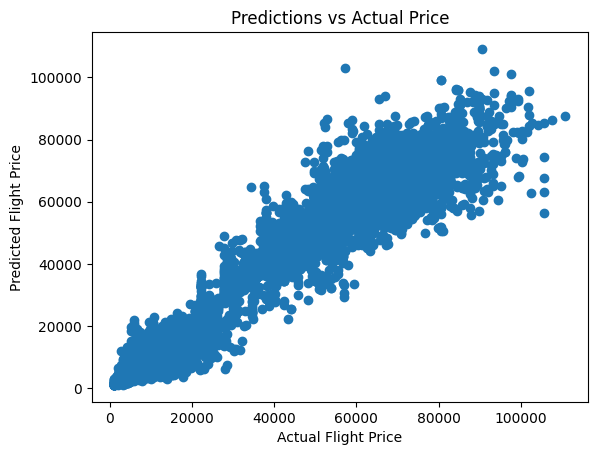

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Predictions vs Actual Price")

In [28]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [29]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', np.float64(0.8799740576084835)),
 ('duration', np.float64(0.05761114226082197)),
 ('days_left', np.float64(0.01854048069170705)),
 ('airline_Air_India', np.float64(0.005180541355753499)),
 ('airline_Vistara', np.float64(0.004798122602594388)),
 ('source_Delhi', np.float64(0.003513237137103737)),
 ('dest_Delhi', np.float64(0.003149499499098769)),
 ('source_Mumbai', np.float64(0.0021666388510157898)),
 ('dest_Mumbai', np.float64(0.0019968985248337793)),
 ('stops', np.float64(0.0018283311396737252)),
 ('dest_Kolkata', np.float64(0.0018140071667941194)),
 ('source_Kolkata', np.float64(0.0017605294555263808)),
 ('arrival_Evening', np.float64(0.0015799751540477767)),
 ('dest_Hyderabad', np.float64(0.0015408118771080249)),
 ('source_Hyderabad', np.float64(0.0013913360542223505)),
 ('dest_Bangalore', np.float64(0.0013417995077260132)),
 ('arrival_Night', np.float64(0.0011717286138353722)),
 ('source_Bangalore', np.float64(0.0010965927409715365)),
 ('departure_Evening', np.float64(0.

<BarContainer object of 10 artists>

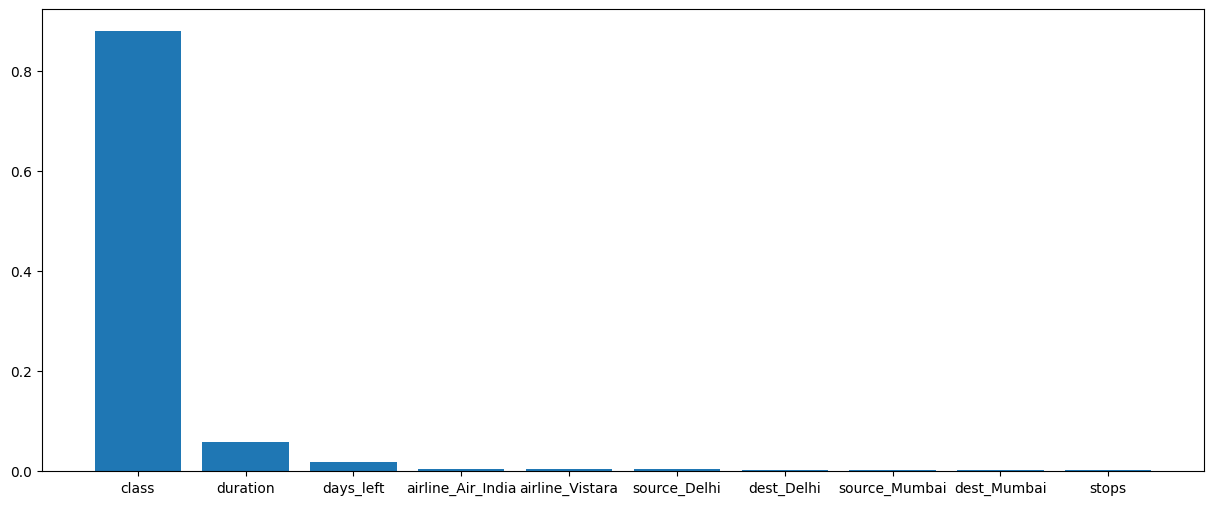

In [32]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": ["auto", "sqrt"]
    }
grid_search = GridSearchCV(estimator=reg ,param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": [None, 10, 20, 30, 0, 50],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1,5),
    "max_features": [1.0, "auto", "sqrt"]
    }

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring="neg_mean_squared_error", verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Users/danielquintana/personal_projects/python-bigdata/flight-price-prediction-python-ml/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/danielquintana/personal_projects/python-bigdata/flight-price-prediction-python-ml/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/danielquintana/personal_projects/python-bigdata/flight-price-prediction-python-ml/venv/lib/python3.11/site-packages/sklearn/base.py", line

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.5s


In [34]:
best_regressor.score(X_test, y_test)

0.9861891582480635

In [37]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9861891582480635
MSE:  7111233.28471695
MAE:  1087.9260397546814
RMSE:  2666.6895741193707


Text(0.5, 1.0, 'Predictions vs Actual Price')

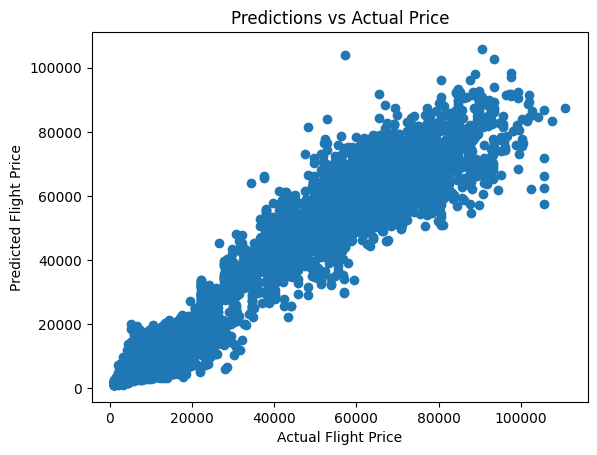

In [38]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Predictions vs Actual Price")